In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("new_insurance_data (1).csv")

In [3]:
df.duplicated().sum()

0

In [4]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [5]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [6]:
# Replace null values

In [7]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [8]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [9]:
#check outliers

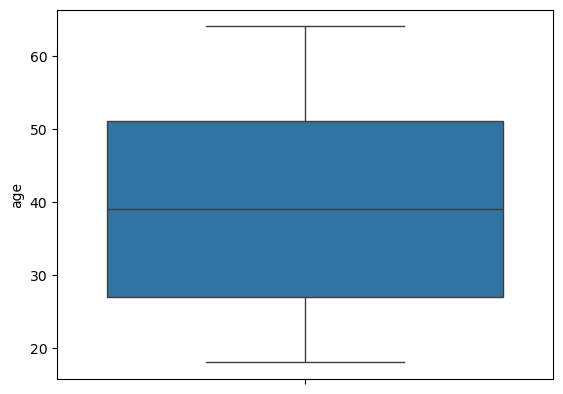

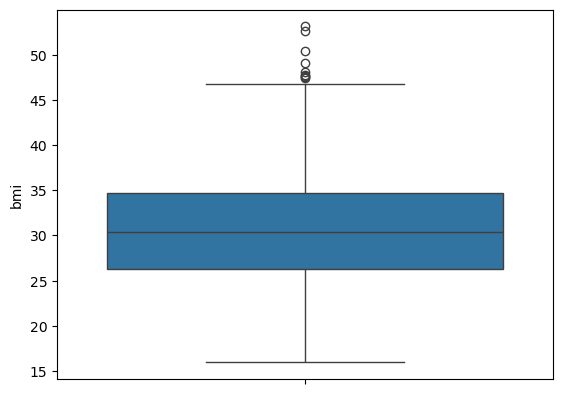

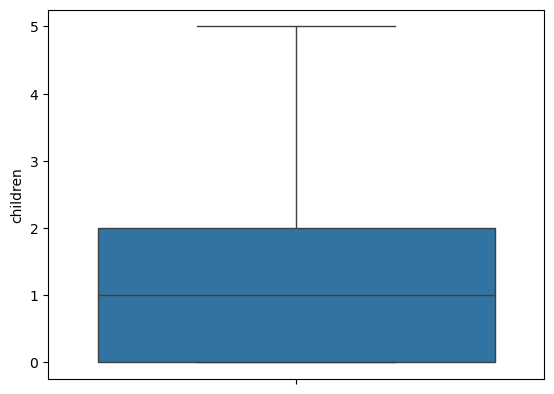

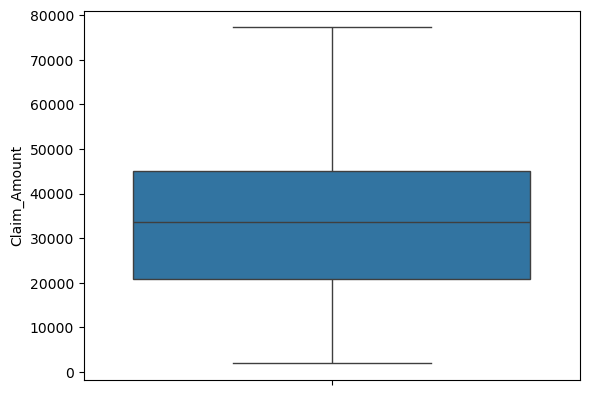

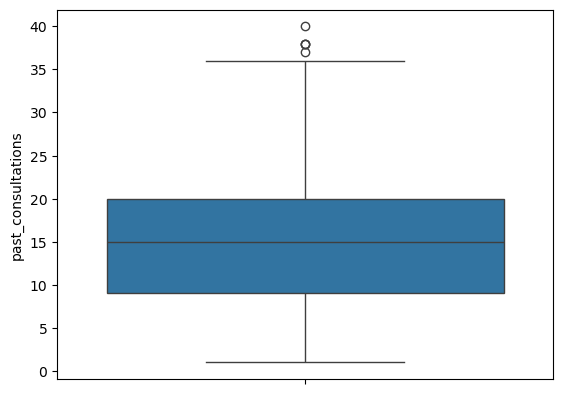

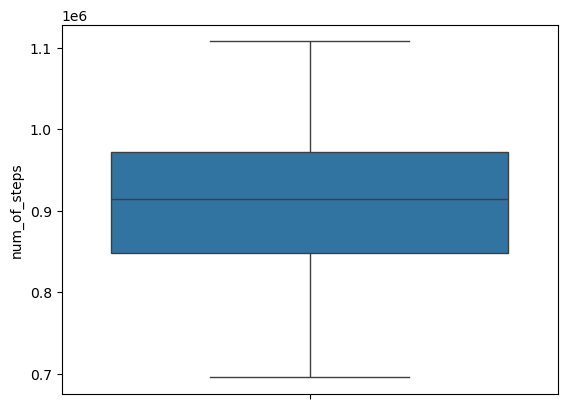

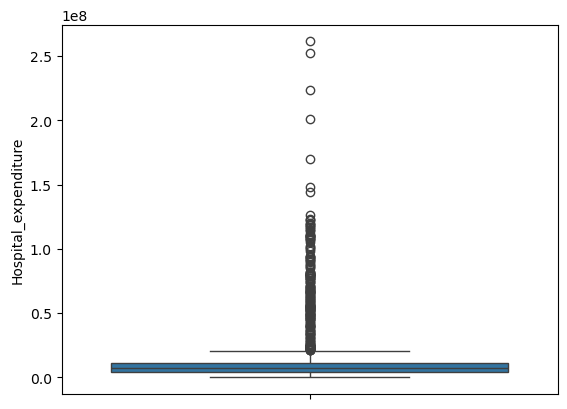

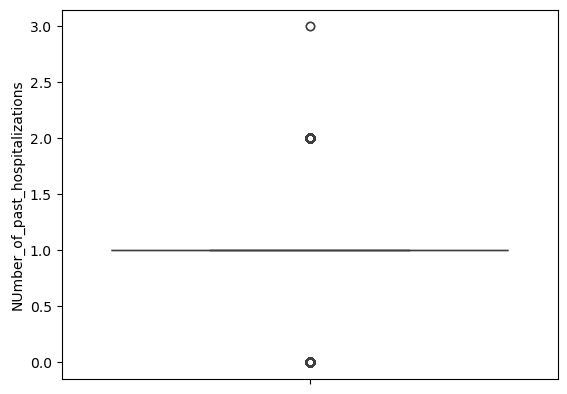

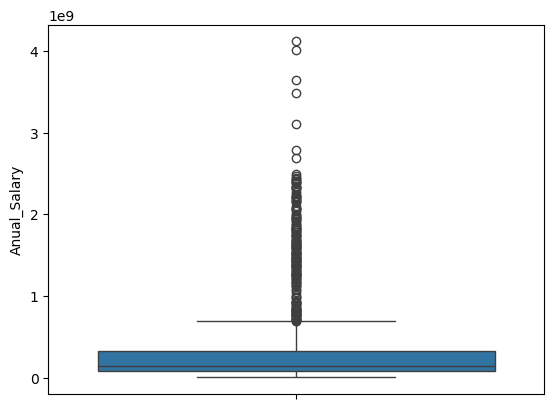

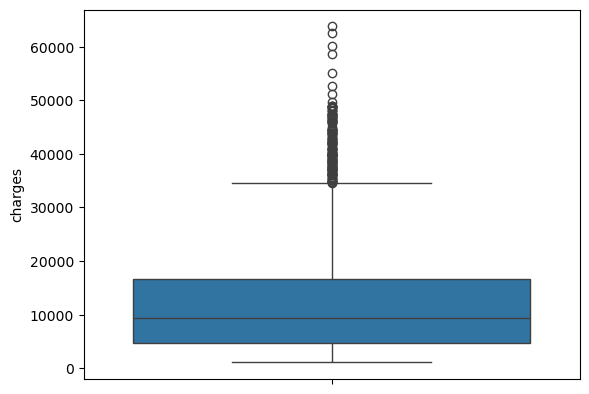

In [10]:
for col in df.columns:
    if(df[col].dtype != 'object'):
        sns.boxplot(data=df, y=col)
        plt.show()

In [11]:
#Removing outlilers

In [12]:
for col in ['bmi','past_consultations','Hospital_expenditure','NUmber_of_past_hospitalizations','Anual_Salary']:
    if(df[col].dtype != 'object'):
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR = Q3-Q1
        LB=Q1-1.5*(IQR)
        UB=Q3+1.5*(IQR)
        df=df[(df[col]>=LB) & (df[col]<=UB)]

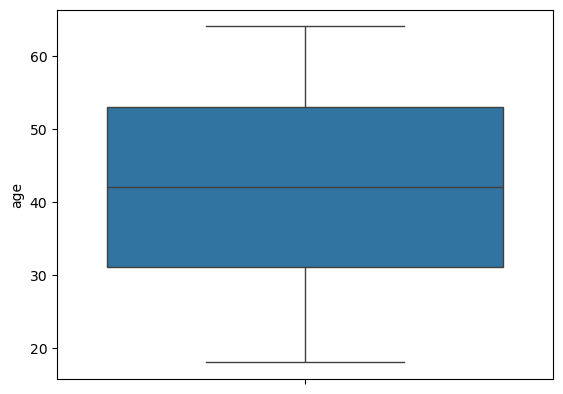

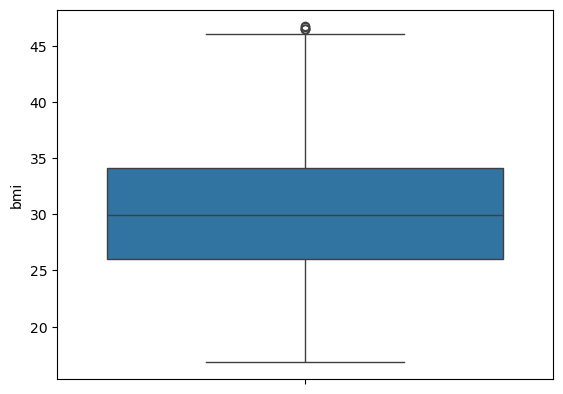

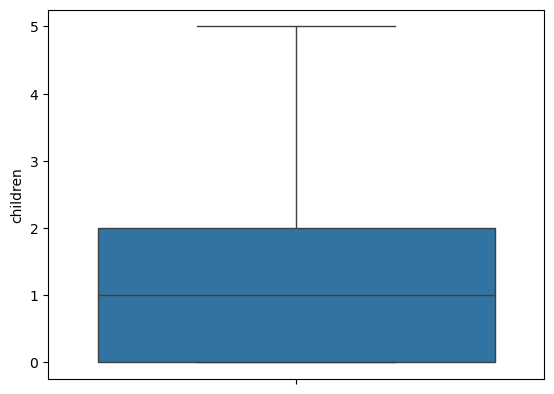

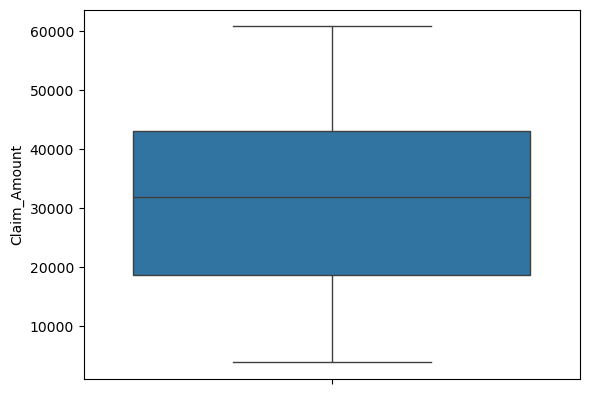

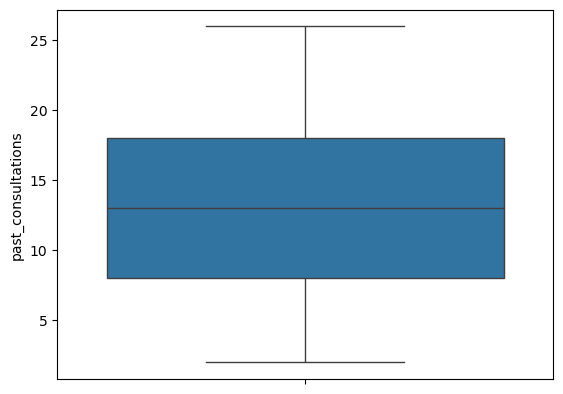

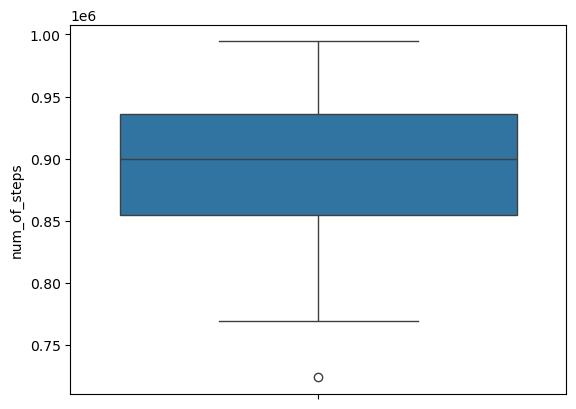

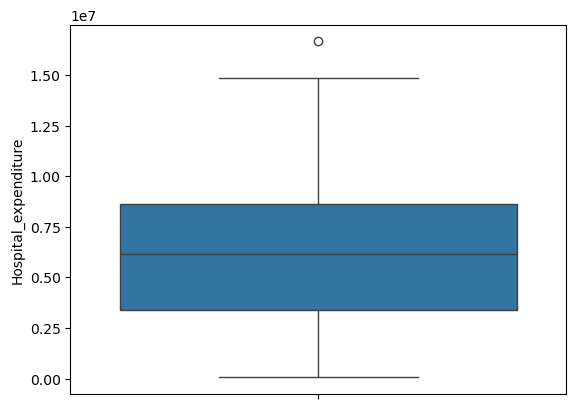

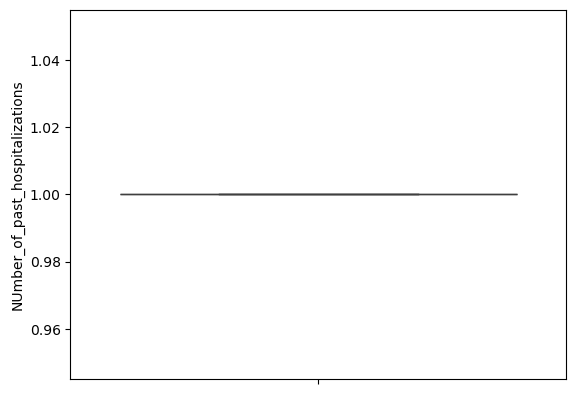

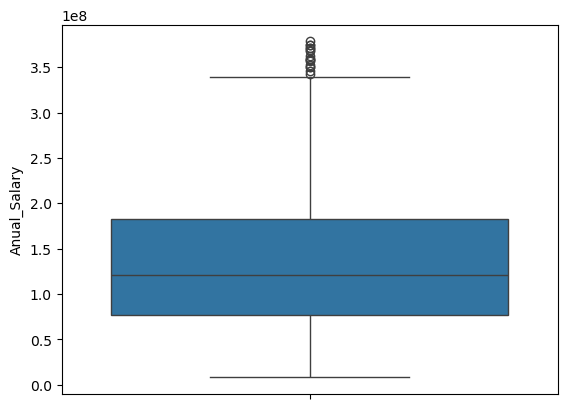

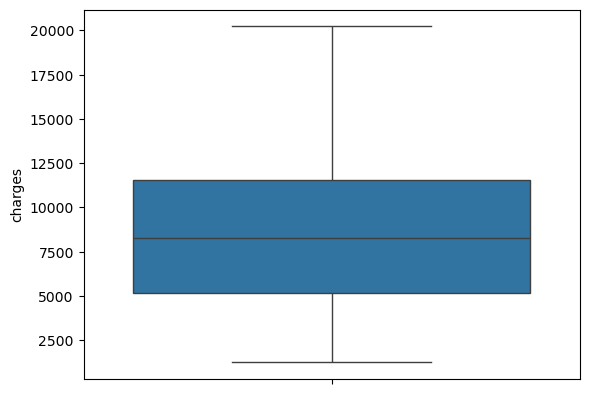

In [13]:
for col in df.columns:
    if(df[col].dtype != 'object'):
        sns.boxplot(data=df, y=col)
        plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 12 to 1069
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              878 non-null    float64
 1   sex                              878 non-null    object 
 2   bmi                              878 non-null    float64
 3   children                         878 non-null    float64
 4   smoker                           878 non-null    object 
 5   Claim_Amount                     878 non-null    float64
 6   past_consultations               878 non-null    float64
 7   num_of_steps                     878 non-null    float64
 8   Hospital_expenditure             878 non-null    float64
 9   NUmber_of_past_hospitalizations  878 non-null    float64
 10  Anual_Salary                     878 non-null    float64
 11  region                           878 non-null    object 
 12  charges                  

In [15]:
#Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in df.columns:
  if(df[col].dtype == 'object'):
    df[col] = LE.fit_transform(df[col])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 12 to 1069
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              878 non-null    float64
 1   sex                              878 non-null    int32  
 2   bmi                              878 non-null    float64
 3   children                         878 non-null    float64
 4   smoker                           878 non-null    int32  
 5   Claim_Amount                     878 non-null    float64
 6   past_consultations               878 non-null    float64
 7   num_of_steps                     878 non-null    float64
 8   Hospital_expenditure             878 non-null    float64
 9   NUmber_of_past_hospitalizations  878 non-null    float64
 10  Anual_Salary                     878 non-null    float64
 11  region                           878 non-null    int32  
 12  charges                  

In [18]:
# Machine Learning - starts

In [19]:
# MODEL BUILDING

In [20]:
# IMPORT LIBRARY
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [21]:
# x-y SPLIT
x = df.drop(columns = ['charges'])
y = df['charges']

In [22]:
# TRAIN-TEST SPLIT
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state = 3)

In [23]:
# TRAINING
my_model = LinearRegression()
my_model.fit(x_train,y_train)

LinearRegression()

In [24]:
# TESTING
y_pred = my_model.predict(x_test)

In [25]:
# EVALUATION
r2_score(y_test,y_pred)                                            #r-squared value

0.9551214796417885

In [26]:
mean_absolute_error(y_test,y_pred)

646.2914112404956

In [27]:
mse = mean_squared_error(y_test,y_pred)
mse

745037.5354969739

In [28]:
np.sqrt(mse)                                                       #root-mean-squared error (rmse)

863.155568537314

<Axes: ylabel='charges'>

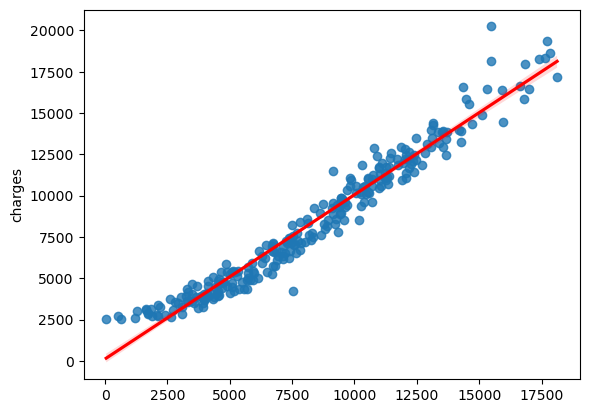

In [29]:
sns.regplot(x = y_pred, y =y_test,line_kws={'color':'red'})

In [30]:
#doing this over 10 times

In [67]:
r_sq = []
rmse = []
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7)
    my_model = LinearRegression()
    my_model.fit(x_train,y_train)
    y_pred = my_model.predict(x_test)
    result = r2_score(y_test,y_pred)
    r_sq.append(result)
    mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse.append(np.sqrt(mse))

print(r_sq)
print(rmse)

[0.9579202124583043, 0.9632311040634924, 0.9636391973239136, 0.9598964855966046, 0.9567909509577724, 0.9620074273848923, 0.952820746983604, 0.9635996608692518, 0.9561036149482776, 0.9510405438834816]
[824.4217035523986, 768.0134045076942, 727.7435591060328, 730.5323854400174, 812.5630367393333, 762.6953616213095, 871.220588223875, 731.2050975806, 863.0734025974226, 870.1029718200601]
